Reference

https://www.kaggle.com/code/mahmoudlimam/dbscan-clustering-tutorial/notebook

In [1]:
import pandas as pd
import sklearn

df = pd.read_excel('../data/wpdb.xlsx')
df.head(5)


,UID,CenterId,StudentName,SchoolName,SchoolGrade,SchoolLevel,StudentGrade,Address,Address2,StudentStatus,cs_count,max_sche_date,withdraw_csl_count,remain_csl_count,supply_count,clinic_count,abs_count,pre_count,target
0,00249736-53A0-4D68-8CB9-DFA306A33435,15,임현승,성동중학교,1학년,high,17,NaN,NaN,drop,5,2023-11-17,0,3,0,0,1,41,0
1,00515C99-00A6-444B-93A3-73D7BB0852E5,15,노해율,내성중학교,3학년,middle,16,부산 동래구 금정마을로 135-9(동래 래미안 아이파크),2단지-5호차,present,5,2023-07-20,0,19,0,0,0,52,0
2,00600FC7-C7DE-40DE-AD7D-A1D94DD5D212,16,신아인,경일중학교,3학년,middle,16,부산 강서구 명지국제7로 110(더 힐 시그니처),NaN,present,8,2024-02-15,0,0,0,0,0,0,1
3,0063DEBD-095C-4804-A246-7EDD5160419A,14,손태윤,브니엘예술중학교,3학년,middle,16,NaN,NaN,drop,2,2023-10-01,0,0,0,0,0,6,0
4,007378EC-9A44-4A75-8B1A-70D13FBE7832,16,오주안,오션중학교,3학년,middle,16,NaN,명지 오션 11로 87,present,29,2024-02-15,0,23,0,0,1,278,1


In [3]:
from sklearn.model_selection import train_test_split

X=df[df.columns[6:]]
X = X.drop(columns = ['Address','Address2', 'max_sche_date', 'StudentStatus', 'abs_count', 'supply_count', 'clinic_count', 'StudentGrade'])

# X = X[:, 5]
X = X.drop(['target'], axis=1)
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X

,cs_count,withdraw_csl_count,remain_csl_count,pre_count
0,5,0,3,41
1,5,0,19,52
2,8,0,0,0
3,2,0,0,6
4,29,0,23,278
...,...,...,...,...
2492,2,1,20,64
2493,9,0,0,0
2494,3,1,9,23
2495,6,0,0,0


In [4]:
X.describe()

,cs_count,withdraw_csl_count,remain_csl_count,pre_count
count,2497.000000,2497.000000,2497.000000,2497.000000
mean,10.095715,0.236684,8.060473,64.474169
std,10.497140,0.648321,9.690521,80.639647
min,1.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,1.000000,4.000000
50%,6.000000,0.000000,4.000000,31.000000
75%,14.000000,0.000000,13.000000,95.000000
max,62.000000,19.000000,64.000000,396.000000


C:\Users\wogus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\wogus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\wogus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\wogus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

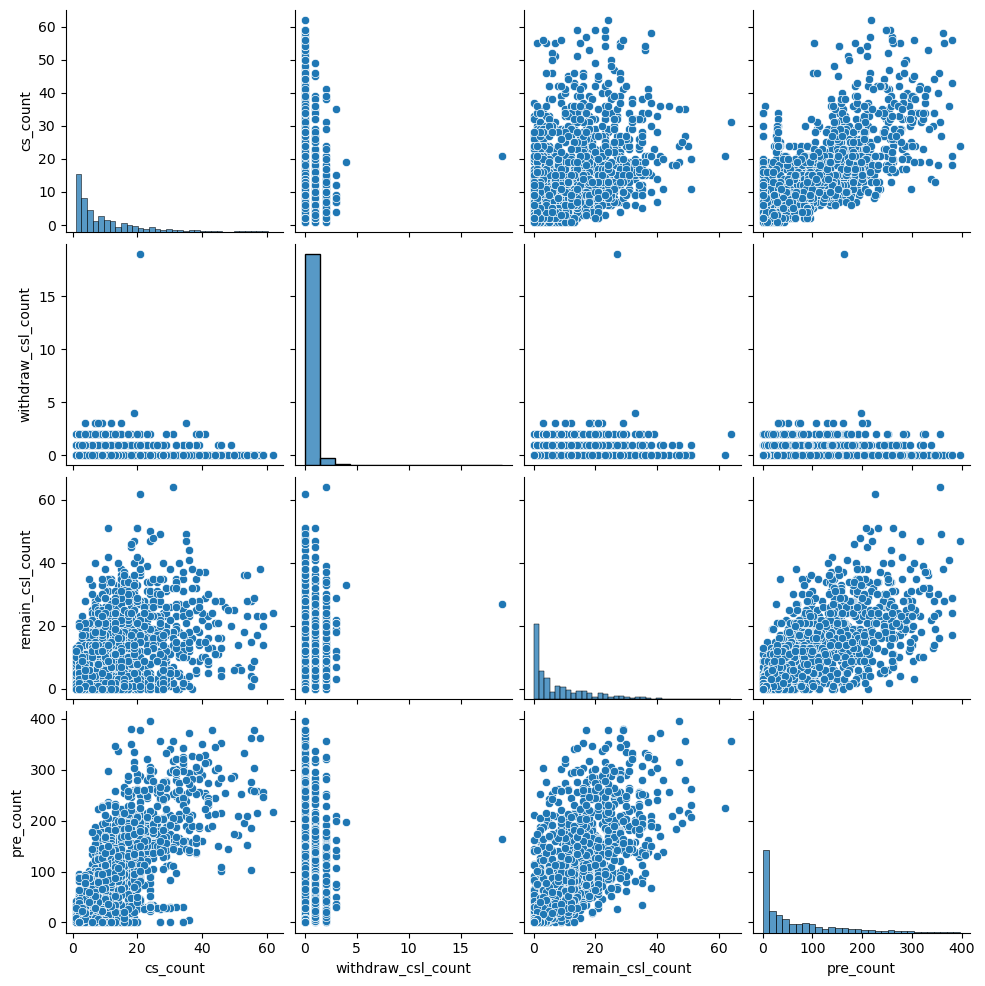

In [5]:
import seaborn as sns

sns.pairplot(X)

In [8]:
X.corr()

,cs_count,withdraw_csl_count,remain_csl_count,pre_count
cs_count,1.000000,-0.006921,0.488435,0.759816
withdraw_csl_count,-0.006921,1.000000,0.167158,0.104993
remain_csl_count,0.488435,0.167158,1.000000,0.763087
pre_count,0.759816,0.104993,0.763087,1.000000


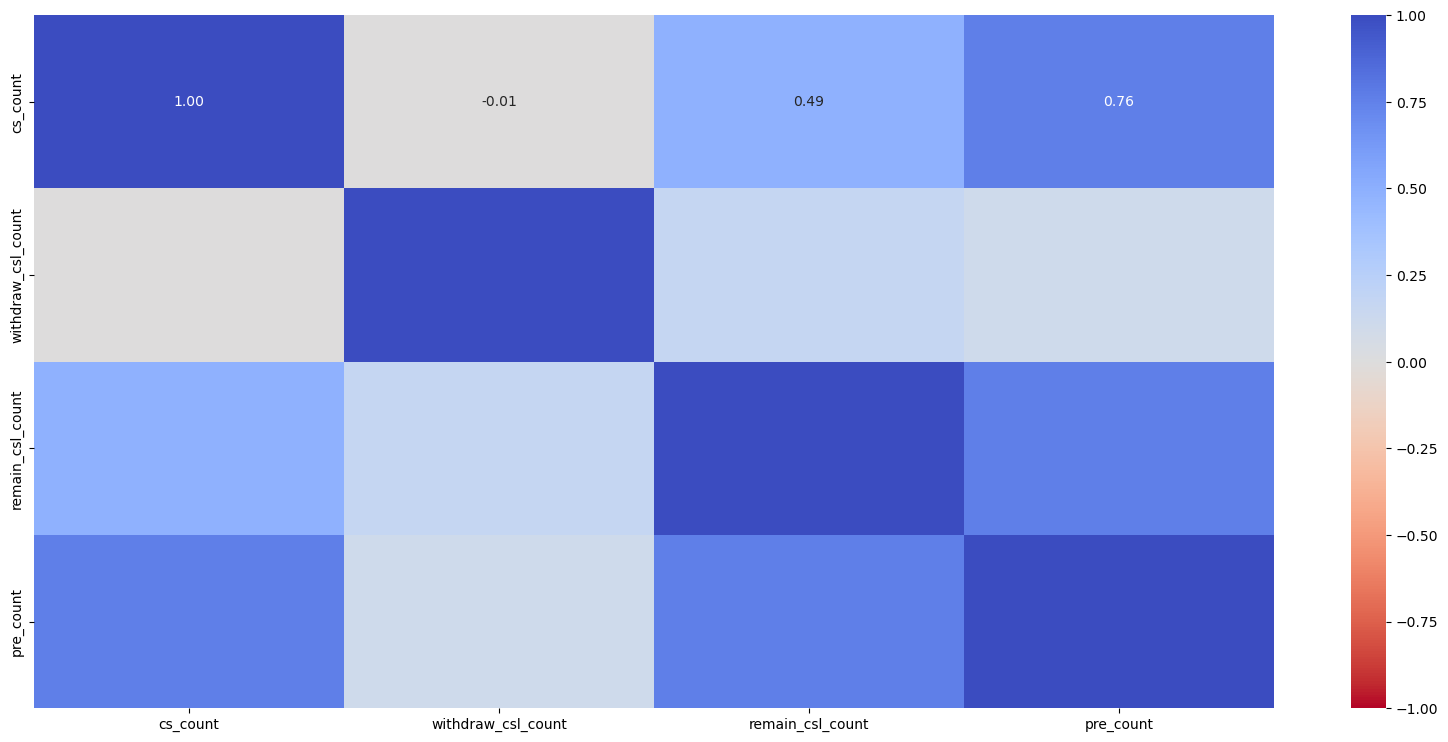

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 9))
sns.heatmap(X.corr(), cmap="coolwarm_r", vmin=-1, annot=True, fmt=".2f")
plt.show()

In [10]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()

data = pd.DataFrame(rs.fit_transform(X), columns=X.columns)

data.head()

,cs_count,withdraw_csl_count,remain_csl_count,pre_count
0,-0.083333,0.0,-0.083333,0.109890
1,-0.083333,0.0,1.250000,0.230769
2,0.166667,0.0,-0.333333,-0.340659
3,-0.333333,0.0,-0.333333,-0.274725
4,1.916667,0.0,1.583333,2.714286


In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data)

pca_data

array([[-0.63631543, -0.16989801],
       [ 0.11901985,  0.31982289],
       [-0.91156792, -0.37488547],
       ...,
       [-0.54302692,  0.90716021],
       [-1.00627933, -0.30306993],
       [ 0.10410366, -0.03557181]])

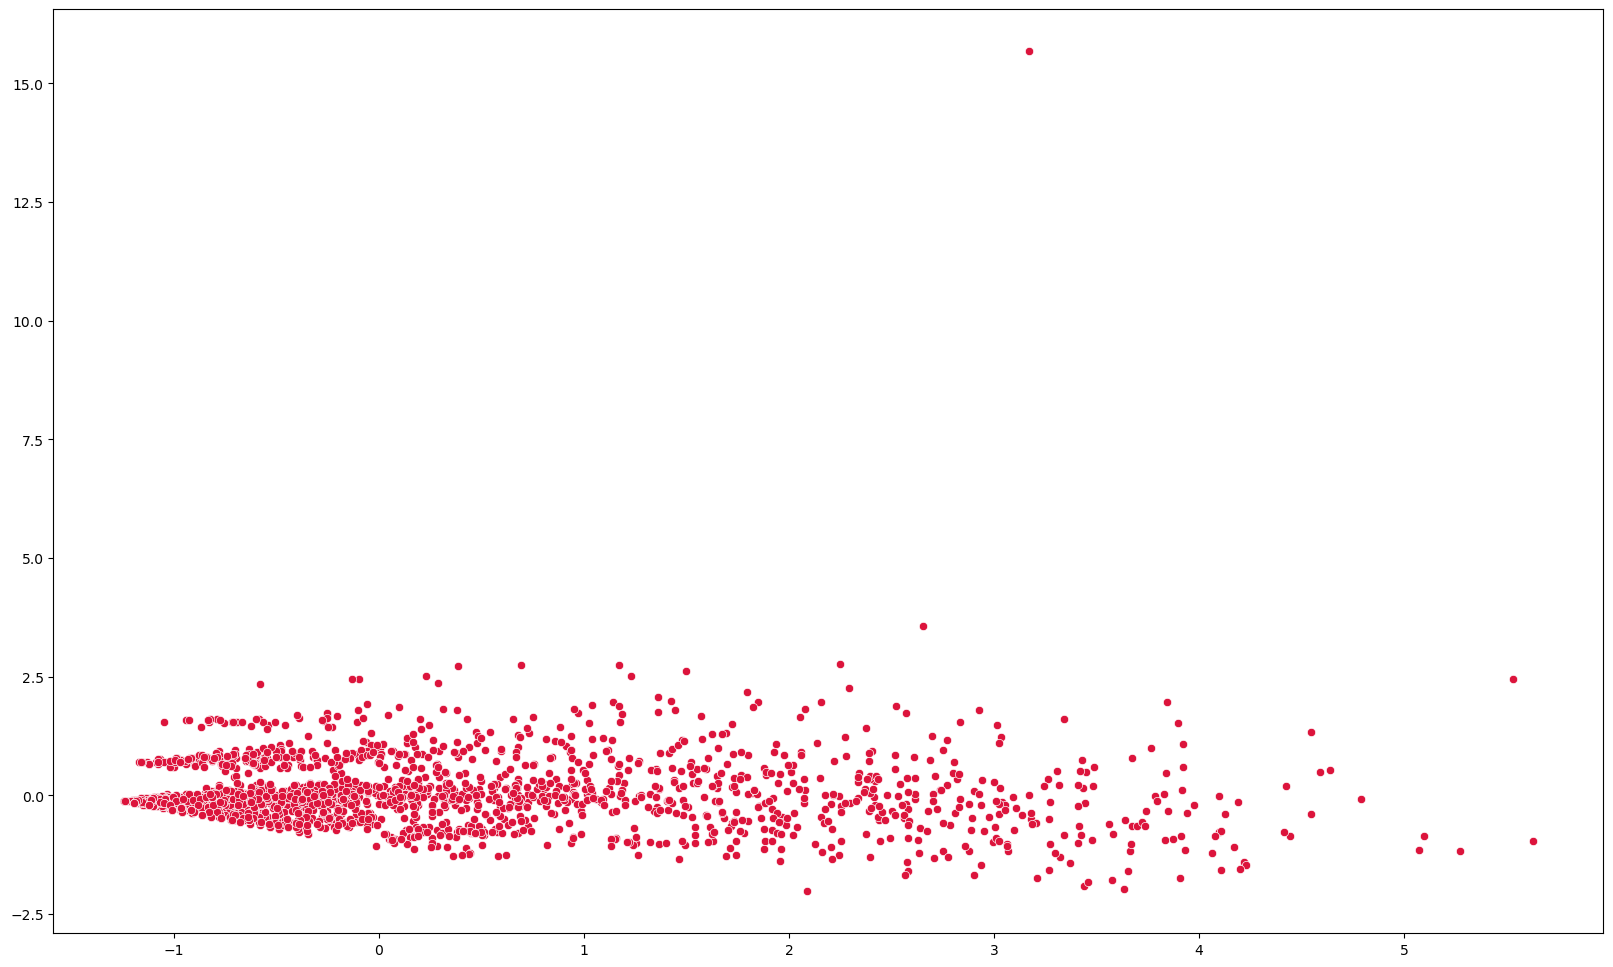

In [12]:
plt.figure(figsize=(20,12))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], color='crimson')
plt.show()

In [13]:
from sklearn.manifold import TSNE
tsne = TSNE()
tsne_data = tsne.fit_transform(data)

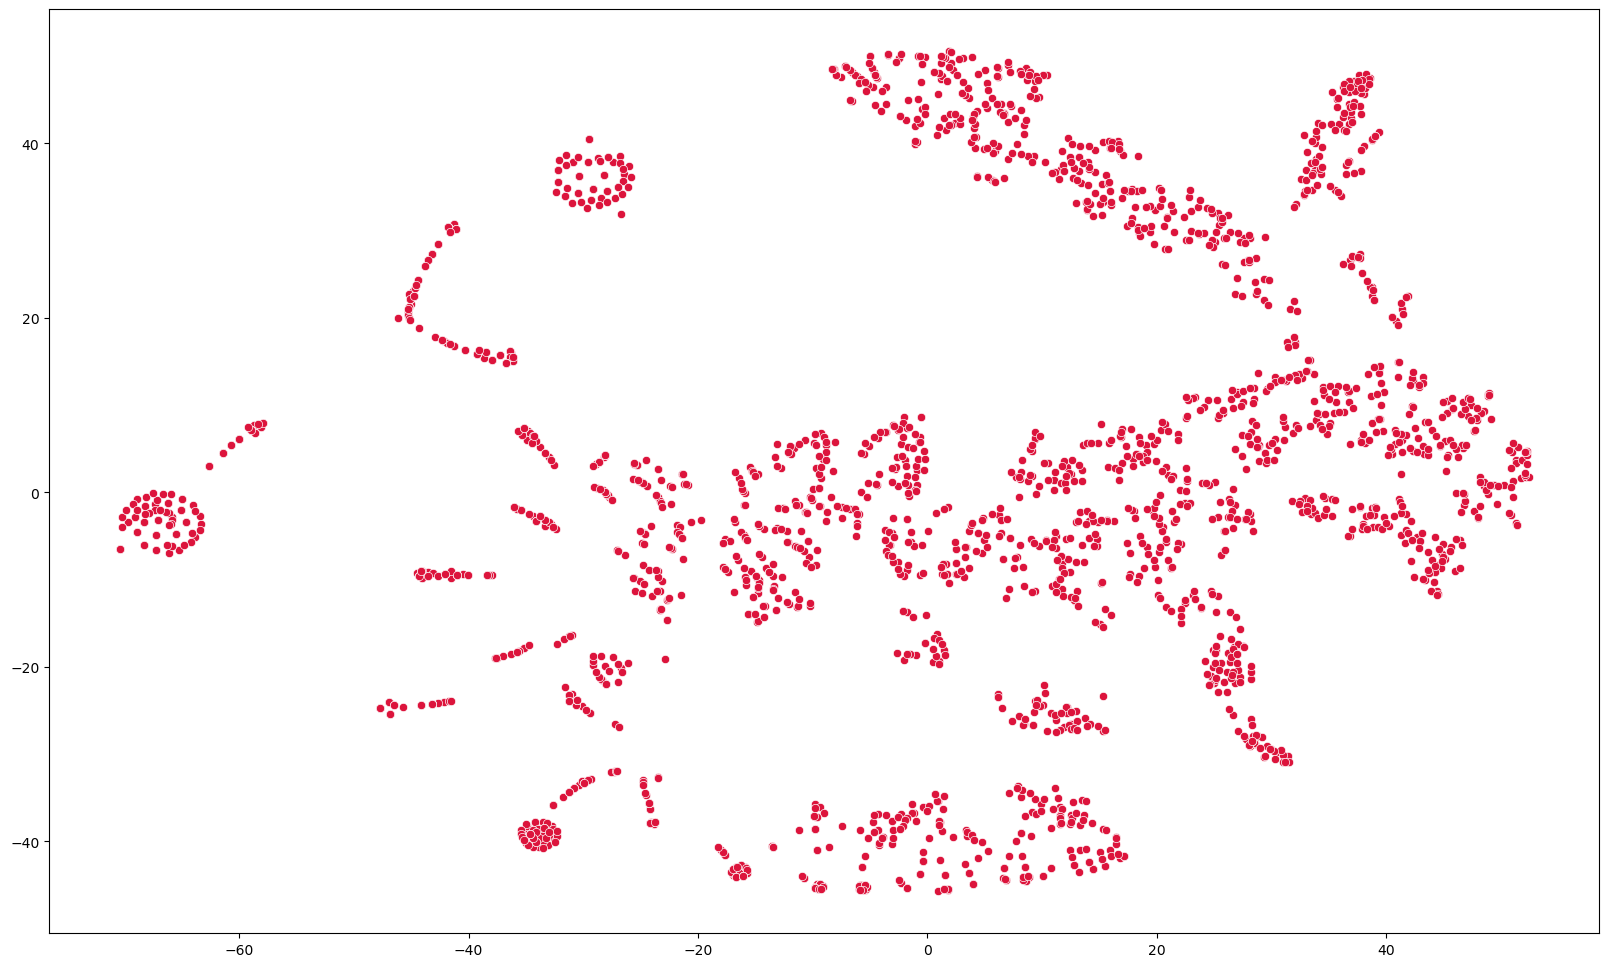

In [14]:
plt.figure(figsize=(20,12))
sns.scatterplot(x=tsne_data[:,0], y=tsne_data[:,1], color="crimson")
plt.show()

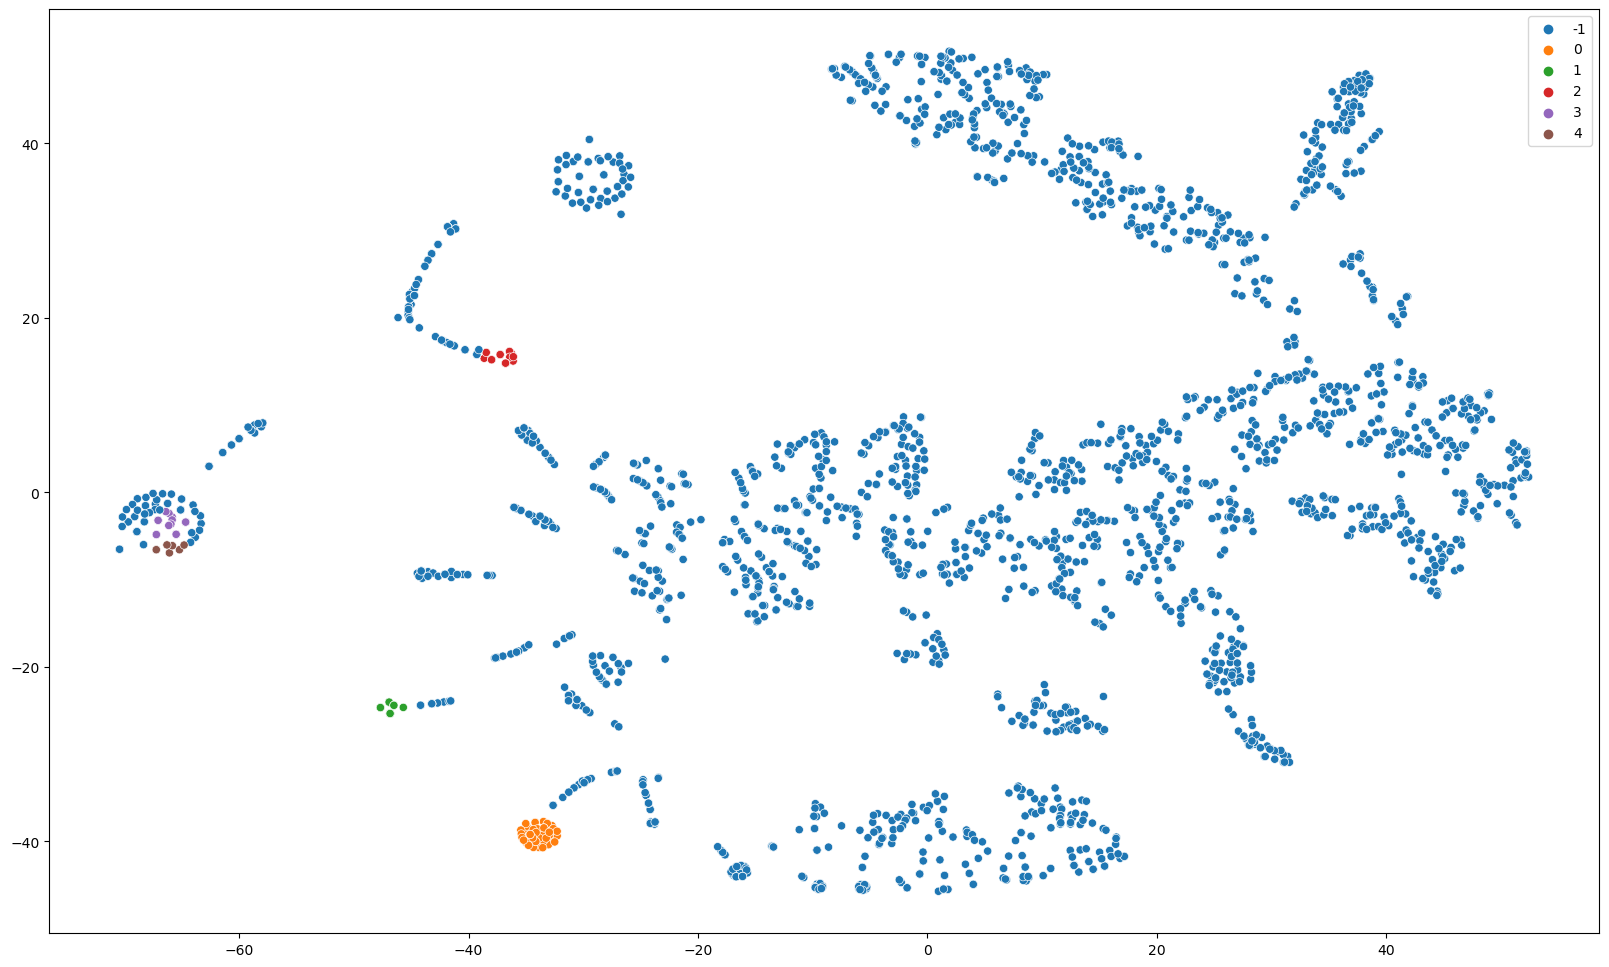

In [31]:
dbscan = DBSCAN(1.6, min_samples=25).fit(tsne_data)
plt.figure(figsize=(20,12))
sns.scatterplot(x=tsne_data[:,0], y=tsne_data[:,1], hue=dbscan.labels_, palette="tab10")
plt.show()

In [16]:
import umap.umap_ as umap

umap = umap.UMAP(random_state=42)
embedding = umap.fit_transform(data)

C:\Users\wogus\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


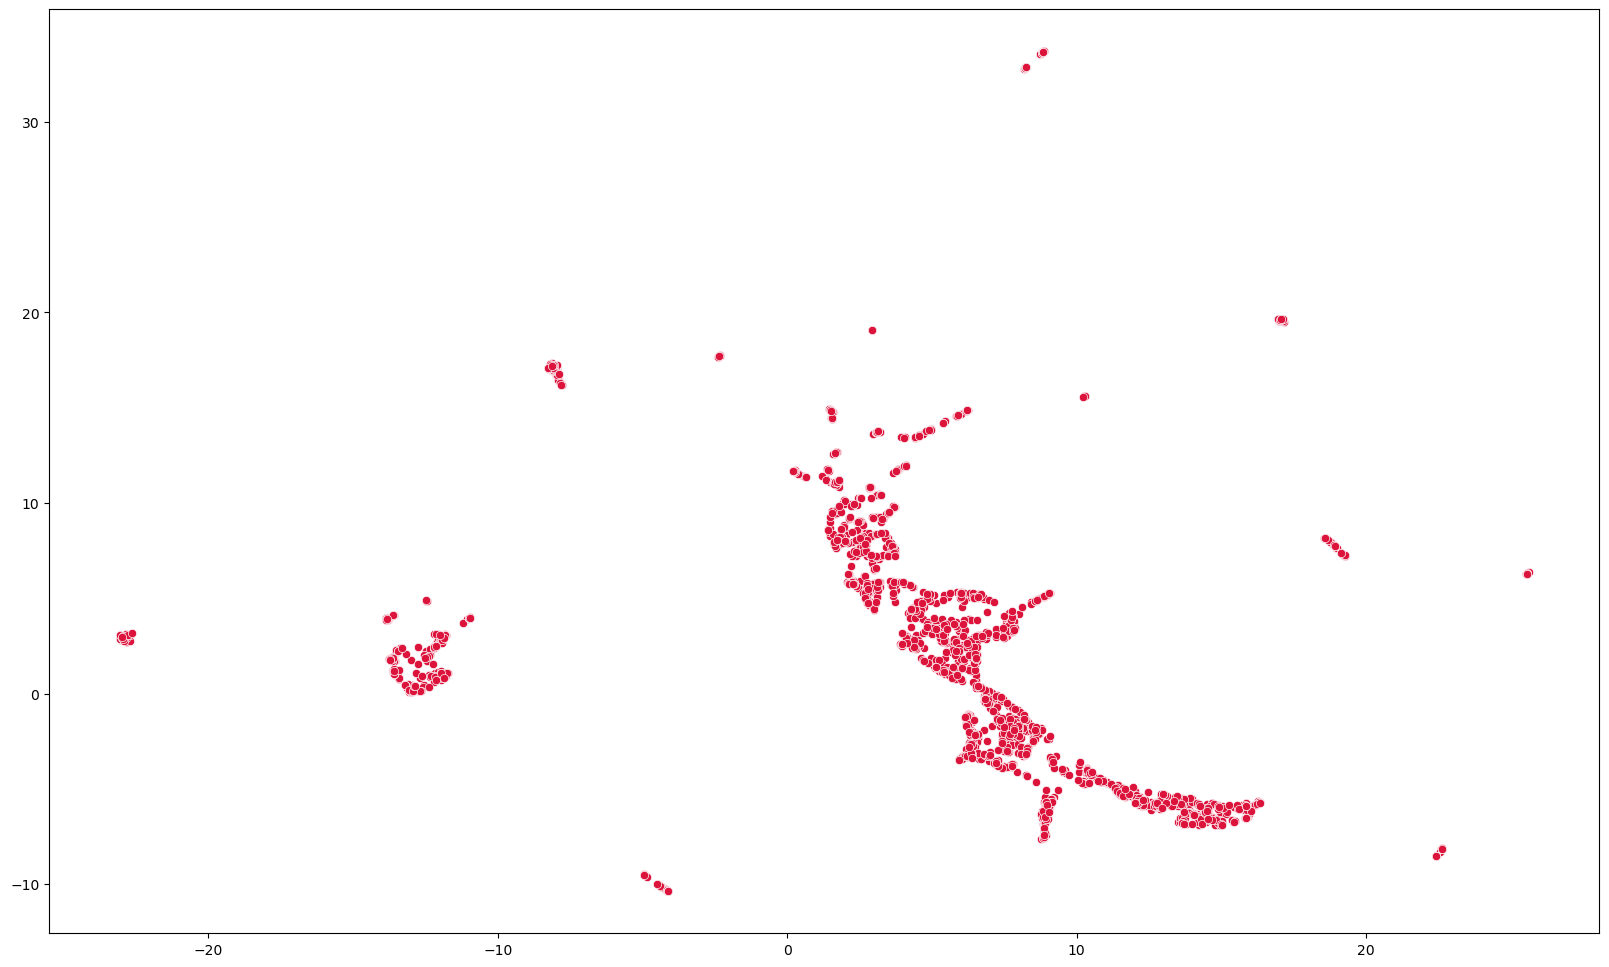

In [17]:
plt.figure(figsize=(20,12))
sns.scatterplot(x=embedding[:,0], y=embedding[:,1], color="crimson")
plt.show()

In [18]:
from sklearn.cluster import DBSCAN

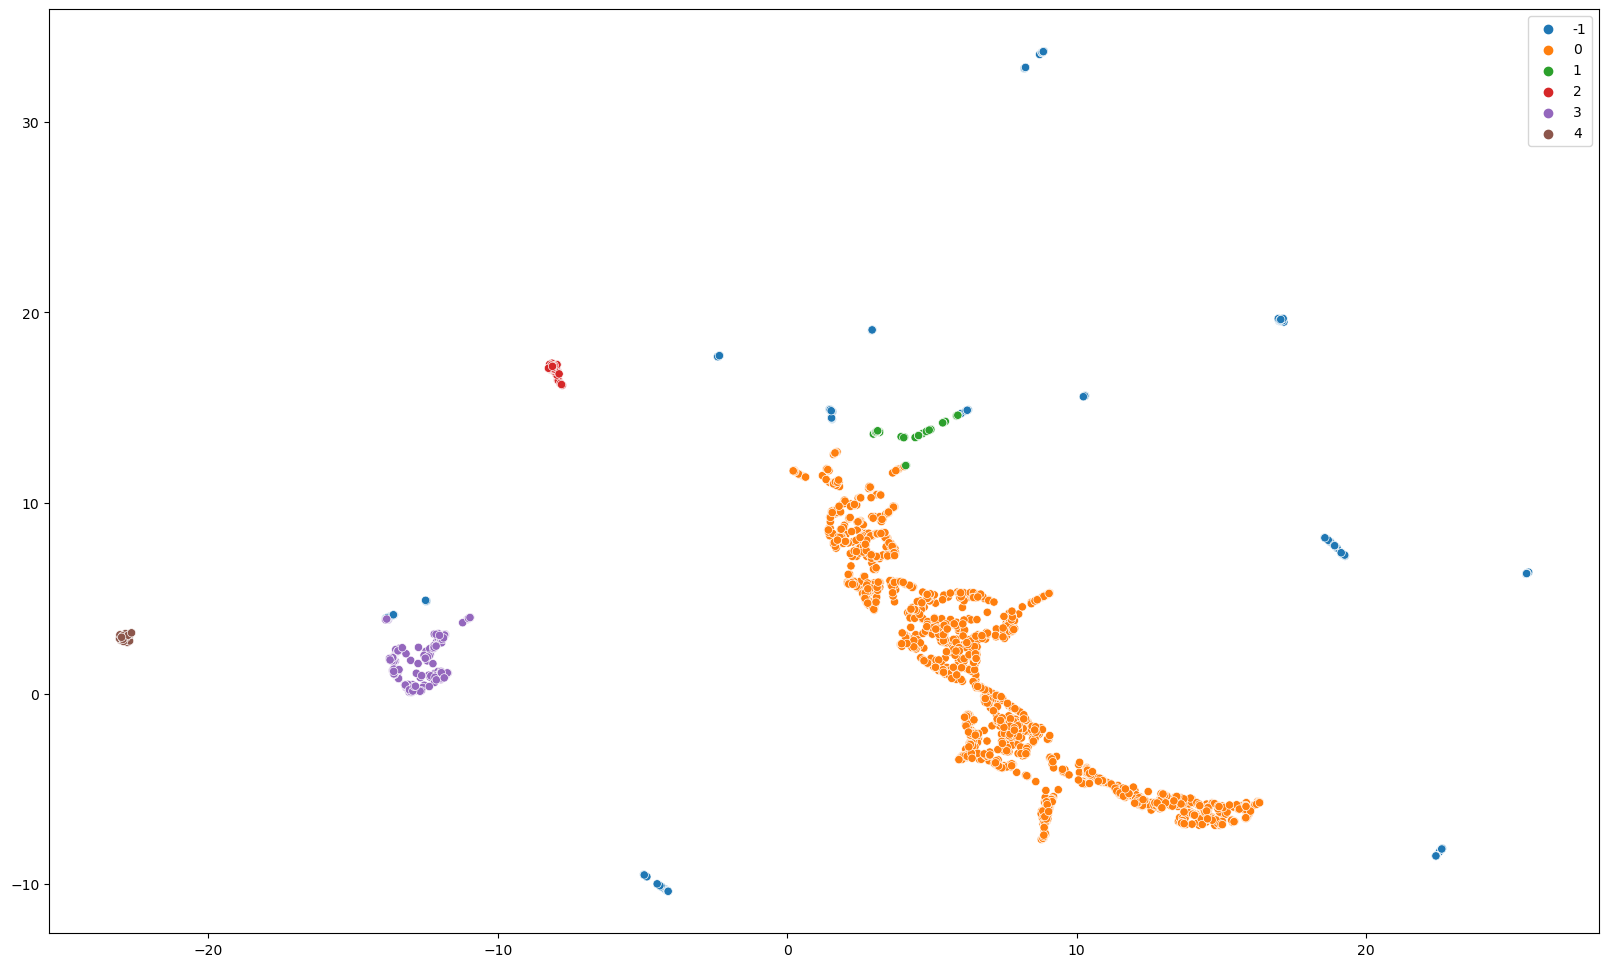

In [34]:
dbscan = DBSCAN(1.6, min_samples=55).fit(embedding)

plt.figure(figsize=(20,12))
sns.scatterplot(x=embedding[:,0], y=embedding[:,1], hue=dbscan.labels_, palette="tab10")
plt.show()